# I] Import functions and options

In [1]:
import pandas, numpy, seaborn
import matplotlib, matplotlib.pyplot as plt
# matplotlib.rcParams.update({'font.size':20, 'xtick.labelsize':20, 
#                             'ytick.labelsize':20, 'figure.figsize':(12, 8)})

In [2]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

# II] Data download

In [3]:
path = 'dataframes_for_input/'

### Zscore expression

In [4]:
%%time
# DL normalized ATG7 isoform expression
df = pandas.read_csv(output_file_directory+ path + 'zscore_df_norm.tsv', sep = '\t')
df= df.rename(columns = {'Unnamed: 0' : 'ensembl_gene_id'})
df = df.dropna(axis=0)
print(df.shape)
df.head()

(19364, 5904)
Wall time: 45.5 s


ensembl_gene_id  GTEX-1117F-0226-SM-5GZZ7  GTEX-1117F-0526-SM-5EGHJ  \
0  ENSG00000198888                  1.190884                  0.898610   
1  ENSG00000198763                 -0.277555                 -0.774308   
2  ENSG00000198804                 -0.152273                 -0.800803   
3  ENSG00000198712                 -0.802258                 -0.601867   
4  ENSG00000228253                  0.462616                  0.462616   

   GTEX-1117F-0626-SM-5N9CS  GTEX-1117F-0726-SM-5GIEN  \
0                 -0.272200                 -0.031037   
1                  0.625942                 -0.074143   
2                 -2.507672                  0.295997   
3                 -1.885034                 -0.388352   
4                  0.462616                  0.462616   

   GTEX-1117F-1326-SM-5EGHH  GTEX-1117F-2226-SM-5N9CH  \
0                  0.898610                 -3.494575   
1                  0.625942                 -4.268193   
2                 -1.238498                 -3.555058   
3                 -0.802258                 -6.763979   
4                  0.462616                 -1.259366   

   GTEX-1117F-2426-SM-5EGGH  GTEX-1117F-2826-SM-5GZXL  \
0                 -1.226637                  1.333401   
1                  0.259062                  0.625942   
2                 -2.701759                 -0.152273   
3                 -2.885276                 -0.802258   
4                  0.462616                  0.462616   

   GTEX-1117F-3026-SM-5GZYU  ...  GTEX-ZZPU-0326-SM-5N9BJ  \
0                  0.898610  ...                 0.765988   
1                 -0.074143  ...                 0.097681   
2                  0.532137  ...                 0.413822   
3                  0.082193  ...                 0.571510   
4                  0.462616  ...                 0.462616   

   GTEX-ZZPU-0526-SM-5E44U  GTEX-ZZPU-0726-SM-5N9C8  GTEX-ZZPU-0926-SM-5GZYT  \
0                 0.352102                -1.652882                 0.765988   
1                 0.097681                -2.623235                -0.277555   
2                 0.413822                -1.116376                 0.829227   
3                 0.311639                -3.506269                 0.311639   
4                 0.462616                -2.288038                 0.462616   

   GTEX-ZZPU-1226-SM-5N9CK  GTEX-ZZPU-1326-SM-5GZWS  GTEX-ZZPU-1826-SM-5E43L  \
0                 0.641517                -0.031037                 0.352102   
1                 0.259062                -0.074143                 0.097681   
2                 0.829227                 0.829227                 0.413822   
3                 0.082193                -0.146301                 0.571510   
4                 0.462616                 0.462616                 0.462616   

   GTEX-ZZPU-2126-SM-5EGIU  GTEX-ZZPU-2226-SM-5EGIV  GTEX-ZZPU-2726-SM-5NQ8O  
0                -0.272200                -1.038047                 0.898610  
1                -0.074143                -1.938165                 0.809955  
2                 0.295997                 0.061081                 0.532137  
3                -0.802258                 0.082193                -0.146301  
4                 0.462616                -0.690261                 0.462616  

[5 rows x 5904 columns]

### Protein coding list: To get symbol

In [5]:
%%time
#download the protein coding list. will be useful with correlation results.
protein_coding_df= pandas.read_csv(input_file_directory + "protein_coding_list.txt" , sep = "\t")
print(protein_coding_df.shape)
protein_coding_df.head()

(22796, 4)
Wall time: 47.9 ms


ensembl_gene_id hgnc_symbol  entrezgene_id transcript_biotype
1  ENSG00000198888      MT-ND1         4535.0     protein_coding
2  ENSG00000198763      MT-ND2         4536.0     protein_coding
3  ENSG00000198804      MT-CO1         4512.0     protein_coding
4  ENSG00000198712      MT-CO2         4513.0     protein_coding
5  ENSG00000228253     MT-ATP8         4509.0     protein_coding

### GTEx info: To have all subgroup tissues

In [6]:
#download the protein coding list.
GTEx_info = pandas.read_csv(input_file_directory+"GTEX_info.tsv", sep = "\t", index_col=0)
print(GTEx_info.shape)
GTEx_info.head()

(9783, 5)


body_site_detail (SMTSD)   _primary_site _gender  \
sample                                                                       
GTEX-1117F-0226-SM-5GZZ7    Adipose - Subcutaneous  Adipose Tissue  female   
GTEX-1117F-0426-SM-5EGHI         Muscle - Skeletal          Muscle  female   
GTEX-1117F-0526-SM-5EGHJ           Artery - Tibial    Blood Vessel  female   
GTEX-1117F-0626-SM-5N9CS         Artery - Coronary    Blood Vessel  female   
GTEX-1117F-0726-SM-5GIEN  Heart - Atrial Appendage           Heart  female   

                            _patient _cohort  
sample                                        
GTEX-1117F-0226-SM-5GZZ7  GTEX-1117F    GTEX  
GTEX-1117F-0426-SM-5EGHI  GTEX-1117F    GTEX  
GTEX-1117F-0526-SM-5EGHJ  GTEX-1117F    GTEX  
GTEX-1117F-0626-SM-5N9CS  GTEX-1117F    GTEX  
GTEX-1117F-0726-SM-5GIEN  GTEX-1117F    GTEX

### Filtered tissues list

In [7]:
#Download the filtered sample list
path = "samples_IDs/"
samples_list_normal= numpy.loadtxt(input_file_directory+path+'filtered_samples_list_normal.tsv', delimiter="\t", dtype=str)

print(len(samples_list_normal))

5903


## III] Data transformation

In [8]:
# Merge to have symbol names, delete the rest
df = protein_coding_df.merge(df)
df = df.drop(['ensembl_gene_id','entrezgene_id', 'transcript_biotype'], axis =1)
print(df.shape)
df.head()

(19507, 5904)


hgnc_symbol  GTEX-1117F-0226-SM-5GZZ7  GTEX-1117F-0526-SM-5EGHJ  \
0      MT-ND1                  1.190884                  0.898610   
1      MT-ND2                 -0.277555                 -0.774308   
2      MT-CO1                 -0.152273                 -0.800803   
3      MT-CO2                 -0.802258                 -0.601867   
4     MT-ATP8                  0.462616                  0.462616   

   GTEX-1117F-0626-SM-5N9CS  GTEX-1117F-0726-SM-5GIEN  \
0                 -0.272200                 -0.031037   
1                  0.625942                 -0.074143   
2                 -2.507672                  0.295997   
3                 -1.885034                 -0.388352   
4                  0.462616                  0.462616   

   GTEX-1117F-1326-SM-5EGHH  GTEX-1117F-2226-SM-5N9CH  \
0                  0.898610                 -3.494575   
1                  0.625942                 -4.268193   
2                 -1.238498                 -3.555058   
3                 -0.802258                 -6.763979   
4                  0.462616                 -1.259366   

   GTEX-1117F-2426-SM-5EGGH  GTEX-1117F-2826-SM-5GZXL  \
0                 -1.226637                  1.333401   
1                  0.259062                  0.625942   
2                 -2.701759                 -0.152273   
3                 -2.885276                 -0.802258   
4                  0.462616                  0.462616   

   GTEX-1117F-3026-SM-5GZYU  ...  GTEX-ZZPU-0326-SM-5N9BJ  \
0                  0.898610  ...                 0.765988   
1                 -0.074143  ...                 0.097681   
2                  0.532137  ...                 0.413822   
3                  0.082193  ...                 0.571510   
4                  0.462616  ...                 0.462616   

   GTEX-ZZPU-0526-SM-5E44U  GTEX-ZZPU-0726-SM-5N9C8  GTEX-ZZPU-0926-SM-5GZYT  \
0                 0.352102                -1.652882                 0.765988   
1                 0.097681                -2.623235                -0.277555   
2                 0.413822                -1.116376                 0.829227   
3                 0.311639                -3.506269                 0.311639   
4                 0.462616                -2.288038                 0.462616   

   GTEX-ZZPU-1226-SM-5N9CK  GTEX-ZZPU-1326-SM-5GZWS  GTEX-ZZPU-1826-SM-5E43L  \
0                 0.641517                -0.031037                 0.352102   
1                 0.259062                -0.074143                 0.097681   
2                 0.829227                 0.829227                 0.413822   
3                 0.082193                -0.146301                 0.571510   
4                 0.462616                 0.462616                 0.462616   

   GTEX-ZZPU-2126-SM-5EGIU  GTEX-ZZPU-2226-SM-5EGIV  GTEX-ZZPU-2726-SM-5NQ8O  
0                -0.272200                -1.038047                 0.898610  
1                -0.074143                -1.938165                 0.809955  
2                 0.295997                 0.061081                 0.532137  
3                -0.802258                 0.082193                -0.146301  
4                 0.462616                -0.690261                 0.462616  

[5 rows x 5904 columns]

In [9]:
#to know the ensembl codes for the targets
targets = 'PINK1', 'PRKN', 'POLG', 'USP30'

for target in targets:
    print(protein_coding_df.loc[protein_coding_df['hgnc_symbol'] == target], '\n')

       ensembl_gene_id hgnc_symbol  entrezgene_id transcript_biotype
19333  ENSG00000158828       PINK1        65018.0     protein_coding 

       ensembl_gene_id hgnc_symbol  entrezgene_id transcript_biotype
10924  ENSG00000185345        PRKN         5071.0     protein_coding 

       ensembl_gene_id hgnc_symbol  entrezgene_id transcript_biotype
14823  ENSG00000140521        POLG         5428.0     protein_coding 

       ensembl_gene_id hgnc_symbol  entrezgene_id transcript_biotype
12998  ENSG00000135093       USP30        84749.0     protein_coding 



In [10]:
# Only keep the three genes of interest
df = df[(df['hgnc_symbol'] == 'PINK1') | 
        (df['hgnc_symbol'] == 'PRKN') | 
        (df['hgnc_symbol'] == 'POLG') | 
        (df['hgnc_symbol'] == 'USP30')]

df.set_index("hgnc_symbol", inplace=True, drop=True)

print(df.shape)
df

(4, 5903)


GTEX-1117F-0226-SM-5GZZ7  GTEX-1117F-0526-SM-5EGHJ  \
hgnc_symbol                                                       
PRKN                         0.025890                  0.674704   
USP30                        0.231250                  0.985217   
POLG                         0.751136                 -0.103563   
PINK1                       -0.034792                 -0.808959   

             GTEX-1117F-0626-SM-5N9CS  GTEX-1117F-0726-SM-5GIEN  \
hgnc_symbol                                                       
PRKN                        -0.034352                  1.382501   
USP30                       -0.596247                 -0.954159   
POLG                        -0.021810                 -1.008489   
PINK1                       -0.203189                  0.388616   

             GTEX-1117F-1326-SM-5EGHH  GTEX-1117F-2226-SM-5N9CH  \
hgnc_symbol                                                       
PRKN                         0.540940                 -0.323986   
USP30                       -0.593741                  0.750701   
POLG                        -0.533838                 -2.828339   
PINK1                       -0.811726                 -1.173416   

             GTEX-1117F-2426-SM-5EGGH  GTEX-1117F-2826-SM-5GZXL  \
hgnc_symbol                                                       
PRKN                        -0.437273                 -0.008163   
USP30                       -0.837553                 -0.285848   
POLG                         0.799228                  1.294515   
PINK1                       -0.763821                 -0.333851   

             GTEX-1117F-3026-SM-5GZYU  GTEX-111CU-0126-SM-5GZWZ  ...  \
hgnc_symbol                                                      ...   
PRKN                        -0.302552                  0.577476  ...   
USP30                       -0.768609                  0.617830  ...   
POLG                         0.088947                 -0.560118  ...   
PINK1                       -0.285229                  1.521120  ...   

             GTEX-ZZPU-0326-SM-5N9BJ  GTEX-ZZPU-0526-SM-5E44U  \
hgnc_symbol                                                     
PRKN                       -0.563242                -0.978305   
USP30                      -1.076959                -1.450132   
POLG                       -0.468563                -0.072368   
PINK1                      -1.062559                -0.885903   

             GTEX-ZZPU-0726-SM-5N9C8  GTEX-ZZPU-0926-SM-5GZYT  \
hgnc_symbol                                                     
PRKN                       -1.235141                 2.551724   
USP30                       0.346827                -0.509196   
POLG                        0.198475                -0.786206   
PINK1                      -0.772949                 1.582175   

             GTEX-ZZPU-1226-SM-5N9CK  GTEX-ZZPU-1326-SM-5GZWS  \
hgnc_symbol                                                     
PRKN                        0.608273                -1.037087   
USP30                       0.952207                 0.120474   
POLG                       -0.581835                 0.110887   
PINK1                       1.518145                -0.135663   

             GTEX-ZZPU-1826-SM-5E43L  GTEX-ZZPU-2126-SM-5EGIU  \
hgnc_symbol                                                     
PRKN                        1.392073                 0.168280   
USP30                      -0.823664                 0.688087   
POLG                       -0.776113                -0.581835   
PINK1                       0.472094                -0.608421   

             GTEX-ZZPU-2226-SM-5EGIV  GTEX-ZZPU-2726-SM-5NQ8O  
hgnc_symbol                                                    
PRKN                       -1.218270                 0.347231  
USP30                      -0.979544                 1.249053  
POLG                       -0.374992                 0.481190  
PINK1                       0.388616                 0.283429  

[4 rows x 5903 colu

In [11]:
#group the two df to have all information. Need subgroup of tissues
df = pandas.concat([GTEx_info.T, df], axis=0)

# The merge added many columns of samples. Only keep the filtered ones
df = df[samples_list_normal]
print(df.shape)

df

(9, 5903)


GTEX-1117F-0226-SM-5GZZ7 GTEX-1117F-0526-SM-5EGHJ  \
body_site_detail (SMTSD)   Adipose - Subcutaneous          Artery - Tibial   
_primary_site                      Adipose Tissue             Blood Vessel   
_gender                                    female                   female   
_patient                               GTEX-1117F               GTEX-1117F   
_cohort                                      GTEX                     GTEX   
PRKN                                      0.02589                 0.674704   
USP30                                     0.23125                 0.985217   
POLG                                     0.751136                -0.103563   
PINK1                                   -0.034792                -0.808959   

                         GTEX-1117F-0626-SM-5N9CS  GTEX-1117F-0726-SM-5GIEN  \
body_site_detail (SMTSD)        Artery - Coronary  Heart - Atrial Appendage   
_primary_site                        Blood Vessel                     Heart   
_gender                                    female                    female   
_patient                               GTEX-1117F                GTEX-1117F   
_cohort                                      GTEX                      GTEX   
PRKN                                    -0.034352                  1.382501   
USP30                                   -0.596247                 -0.954159   
POLG                                     -0.02181                 -1.008489   
PINK1                                   -0.203189                  0.388616   

                              GTEX-1117F-1326-SM-5EGHH  \
body_site_detail (SMTSD)  Adipose - Visceral (Omentum)   
_primary_site                           Adipose Tissue   
_gender                                         female   
_patient                                    GTEX-1117F   
_cohort                                           GTEX   
PRKN                                           0.54094   
USP30                                        -0.593741   
POLG                                         -0.533838   
PINK1                                        -0.811726   

                         GTEX-1117F-2226-SM-5N9CH GTEX-1117F-2426-SM-5EGGH  \
body_site_detail (SMTSD)                    Ovary                   Uterus   
_primary_site                               Ovary                   Uterus   
_gender                                    female                   female   
_patient                               GTEX-1117F               GTEX-1117F   
_cohort                                      GTEX                     GTEX   
PRKN                                    -0.323986                -0.437273   
USP30                                    0.750701                -0.837553   
POLG                                    -2.828339                 0.799228   
PINK1                                   -1.173416                -0.763821   

                         GTEX-1117F-2826-SM-5GZXL GTEX-1117F-3026-SM-5GZYU  \
body_site_detail (SMTSD)  Breast - Mammary Tissue     Minor Salivary Gland   
_primary_site                              Breast           Salivary Gland   
_gender                                    female                   female   
_patient                               GTEX-1117F               GTEX-1117F   
_cohort                                      GTEX                     GTEX   
PRKN                                    -0.008163                -0.302552   
USP30                                   -0.285848                -0.768609   
POLG                                     1.294515                 0.088947   
PINK1                                   -0.333851                -0.285229   

                         GTEX-111CU-0126-SM-5GZWZ  ...  \
body_site_detail (SMTSD)            Adrenal Gland  ...   
_primary_site                       Adrenal Gland  ...   
_gender                                      male  ...   
_patient                               GTEX-111CU  ...   
_cohort             

In [12]:
df = df.T
df.head()

body_site_detail (SMTSD)   _primary_site  \
GTEX-1117F-0226-SM-5GZZ7        Adipose - Subcutaneous  Adipose Tissue   
GTEX-1117F-0526-SM-5EGHJ               Artery - Tibial    Blood Vessel   
GTEX-1117F-0626-SM-5N9CS             Artery - Coronary    Blood Vessel   
GTEX-1117F-0726-SM-5GIEN      Heart - Atrial Appendage           Heart   
GTEX-1117F-1326-SM-5EGHH  Adipose - Visceral (Omentum)  Adipose Tissue   

                         _gender    _patient _cohort      PRKN     USP30  \
GTEX-1117F-0226-SM-5GZZ7  female  GTEX-1117F    GTEX   0.02589   0.23125   
GTEX-1117F-0526-SM-5EGHJ  female  GTEX-1117F    GTEX  0.674704  0.985217   
GTEX-1117F-0626-SM-5N9CS  female  GTEX-1117F    GTEX -0.034352 -0.596247   
GTEX-1117F-0726-SM-5GIEN  female  GTEX-1117F    GTEX  1.382501 -0.954159   
GTEX-1117F-1326-SM-5EGHH  female  GTEX-1117F    GTEX   0.54094 -0.593741   

                              POLG     PINK1  
GTEX-1117F-0226-SM-5GZZ7  0.751136 -0.034792  
GTEX-1117F-0526-SM-5EGHJ -0.103563 -0.808959  
GTEX-1117F-0626-SM-5N9CS  -0.02181 -0.203189  
GTEX-1117F-0726-SM-5GIEN -1.008489  0.388616  
GTEX-1117F-1326-SM-5EGHH -0.533838 -0.811726

## IV] Data visualization and filtration

In [13]:
# Primary Sites
df['_primary_site'].value_counts()

Brain              818
Esophagus          629
Blood Vessel       603
Skin               544
Adipose Tissue     510
Colon              295
Lung               285
Thyroid            278
Nerve              278
Breast             179
Testis             157
Muscle             150
Heart              122
Adrenal Gland      121
Stomach            119
Pituitary          107
Prostate            99
Spleen              97
Small Intestine     90
Ovary               88
Vagina              84
Uterus              78
Salivary Gland      53
Pancreas            36
Liver               27
Kidney              15
Blood               13
Cervix Uteri        10
Bladder              9
Fallopian Tube       5
<not provided>       4
Name: _primary_site, dtype: int64

In [14]:
# Subgrouped Sites
df['body_site_detail (SMTSD)'].value_counts()

Skin - Sun Exposed (Lower leg)               318
Adipose - Subcutaneous                       317
Lung                                         285
Artery - Tibial                              281
Thyroid                                      278
Nerve - Tibial                               278
Esophagus - Mucosa                           257
Esophagus - Muscularis                       239
Skin - Not Sun Exposed (Suprapubic)          227
Artery - Aorta                               204
Adipose - Visceral (Omentum)                 193
Breast - Mammary Tissue                      179
Colon - Transverse                           157
Testis                                       157
Muscle - Skeletal                            150
Colon - Sigmoid                              138
Esophagus - Gastroesophageal Junction        135
Adrenal Gland                                121
Stomach                                      120
Brain - Cerebellum                           118
Artery - Coronary   

In [15]:
#Remove tissues with lower than 20 samples. 
element_to_delete = []
#select all the elements in primary sites, and note which one are <20
working_elements = df["body_site_detail (SMTSD)"].to_list()
for element in working_elements:
    if working_elements.count(element) < 20:
        element_to_delete.append(element)

#Convert to Set() to have a clear list 
element_to_delete = set(element_to_delete)
print('elements with less than 20 samples are:', element_to_delete)

#Remove the samples where the tissue is represented less than 20 times
print('shape with all the elements', df.shape)
for element in element_to_delete:
    df = df.loc[df["body_site_detail (SMTSD)"] != element]
print('shape after removing the elements', df.shape)

elements with less than 20 samples are: {'Whole Blood', 'Kidney - Cortex', 'Cervix - Endocervix', 'Bladder', 'Cervix - Ectocervix', 'Fallopian Tube'}
shape with all the elements (5903, 9)
shape after removing the elements (5851, 9)


###  Group with Primary Site or Subgrouped sited

#### Group by primary site

In [43]:
## Group by primary_site
df_sites = df[['_primary_site', 'PINK1', 'PRKN', 'USP30', 'POLG']] 
df_sites.reset_index(inplace=True, drop=True)

# add n= in a new column
length = len(df_sites)
for i in range(length):
    value = df_sites [df_sites['_primary_site'] == df_sites['_primary_site'][i]].count()  
    df_sites.loc[i , 'n='] = f'({value[1]})'

# add n= in a new column
df_sites['_primary_site'] = df_sites[['_primary_site', 'n=']].agg(' '.join, axis=1)
df_sites.head()

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\3851286106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sites.loc[i , '

_primary_site     PINK1      PRKN     USP30      POLG     n=
0  Adipose Tissue (510) -0.034792   0.02589   0.23125  0.751136  (510)
1    Blood Vessel (603) -0.808959  0.674704  0.985217 -0.103563  (603)
2    Blood Vessel (603) -0.203189 -0.034352 -0.596247  -0.02181  (603)
3           Heart (122)  0.388616  1.382501 -0.954159 -1.008489  (122)
4  Adipose Tissue (510) -0.811726   0.54094 -0.593741 -0.533838  (510)

In [45]:
# Four samples are not referenced
df_sites = df_sites[df_sites['_primary_site'] != '<not provided> (4)']
df_sites

_primary_site     PINK1      PRKN     USP30      POLG     n=
0     Adipose Tissue (510) -0.034792   0.02589   0.23125  0.751136  (510)
1       Blood Vessel (603) -0.808959  0.674704  0.985217 -0.103563  (603)
2       Blood Vessel (603) -0.203189 -0.034352 -0.596247  -0.02181  (603)
3              Heart (122)  0.388616  1.382501 -0.954159 -1.008489  (122)
4     Adipose Tissue (510) -0.811726   0.54094 -0.593741 -0.533838  (510)
...                    ...       ...       ...       ...       ...    ...
5846         Thyroid (278) -0.135663 -1.037087  0.120474  0.110887  (278)
5847       Esophagus (629)  0.472094  1.392073 -0.823664 -0.776113  (629)
5848            Ovary (88) -0.608421   0.16828  0.688087 -0.581835   (88)
5849           Vagina (84)  0.388616  -1.21827 -0.979544 -0.374992   (84)
5850  Adipose Tissue (510)  0.283429  0.347231  1.249053   0.48119  (510)

[5847 rows x 6 columns]

In [46]:
#GroupBy and sort by PINK1 expression
df_sites = df_sites.groupby('_primary_site').agg(numpy.mean)
df_sites = df_sites.sort_values('PINK1', ascending=False)

df_sites

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2747835850.py:2: FutureWarning: The operation <function mean at 0x00000292F9F99790> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  df_sites = df_sites.groupby('_primary_site').agg(numpy.mean)


PINK1      PRKN     USP30      POLG
_primary_site                                               
Muscle (150)          1.814207  2.502735  0.666638  0.079128
Brain (818)           1.466774  0.883290  0.832115 -0.911763
Adrenal Gland (121)   1.450759  0.734992  1.081608 -0.444550
Testis (157)          1.084929  0.303190  2.030709 -1.572736
Heart (122)           0.701862  1.822452 -0.674622 -0.676935
Colon (295)          -0.064466 -0.190031 -0.049251  0.402488
Liver (27)           -0.090578 -0.814294  0.728411  0.575303
Esophagus (629)      -0.100974 -0.155742 -0.817879  0.198482
Nerve (278)          -0.191767 -0.484175 -0.260329  0.941179
Skin (544)           -0.286192 -0.333220  0.647648  0.582990
Blood Vessel (603)   -0.318043  0.333662 -0.325923 -0.594675
Stomach (119)        -0.376840 -0.221819 -0.737443  0.237620
Salivary Gland (53)  -0.380077 -0.768006 -0.652250 -0.007621
Adipose Tissue (510) -0.380433  0.041086 -0.070239  0.294638
Thyroid (278)        -0.422561 -0.910948 -0.695937  0.180859
Prostate (99)        -0.472879 -0.936831 -0.682600  0.511220
Breast (179)         -0.550976 -0.279833  0.034889  0.242514
Vagina (84)          -0.592630 -0.983206 -0.463234  0.042193
Uterus (78)          -0.682029 -0.336714  0.013915 -0.005164
Pituitary (107)      -0.694846 -0.588038  1.100964 -0.406045
Small Intestine (90) -0.845759 -0.967097 -0.161602  1.028774
Ovary (88)           -1.085237 -0.028934  0.576707 -0.453846
Pancreas (36)        -1.210071 -0.931767 -0.183302  0.420130
Lung (285)           -1.227016 -1.090969 -0.948478  0.302586
Spleen (97)          -1.276768 -1.103766 -1.416615  1.866676

#### group by Subgrouped site

In [18]:
## Same for SubGrouped Site
df_subg = df[['body_site_detail (SMTSD)', 'PINK1', 'PRKN', 'USP30', 'POLG']] 
df_subg.reset_index(inplace=True, drop=True)

# add n= in a new column
length = len(df_subg)
for i in range(length):
    value = df_subg [df_subg['body_site_detail (SMTSD)'] == df_subg['body_site_detail (SMTSD)'][i]].count()  
#     df_subg['n='][i] = f'({value[1]})' same thing without LOC
    df_subg.loc[i , 'n='] = f'({value[1]})'
    
# pull the column with tissue name and n= 
df_subg['body_site_detail (SMTSD)'] = df_subg[['body_site_detail (SMTSD)', 'n=']].agg(' '.join, axis=1)
df_subg.head()

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , 'n='] = f'({value[1]})'
C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg.loc[i , '

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\2971378084.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subg['body_site_detail (SMTSD)'] = df_subg[['body_site_detail (SMTSD)', 'n=']].agg(' '.join, axis=1)


body_site_detail (SMTSD)     PINK1      PRKN     USP30      POLG  \
0        Adipose - Subcutaneous (317) -0.034792   0.02589   0.23125  0.751136   
1               Artery - Tibial (281) -0.808959  0.674704  0.985217 -0.103563   
2             Artery - Coronary (118) -0.203189 -0.034352 -0.596247  -0.02181   
3       Heart - Atrial Appendage (87)  0.388616  1.382501 -0.954159 -1.008489   
4  Adipose - Visceral (Omentum) (193) -0.811726   0.54094 -0.593741 -0.533838   

      n=  
0  (317)  
1  (281)  
2  (118)  
3   (87)  
4  (193)

In [19]:
#GroupBy and sort by PINK1 expression
df_subg = df_subg.groupby('body_site_detail (SMTSD)').agg(numpy.mean)
df_subg = df_subg.sort_values('PINK1', ascending=False)

df_subg

C:\Users\kja11\AppData\Local\Temp\ipykernel_15044\639946375.py:2: FutureWarning: The operation <function mean at 0x00000292F9F99790> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  df_subg = df_subg.groupby('body_site_detail (SMTSD)').agg(numpy.mean)


PINK1      PRKN     USP30  \
body_site_detail (SMTSD)                                                       
Brain - Cortex (95)                             2.102397  1.274955  0.729321   
Brain - Frontal Cortex (BA9) (83)               2.081281  1.524534  0.511190   
Brain - Substantia nigra (34)                   1.976012  0.350532  0.751187   
Brain - Anterior cingulate cortex (BA24) (54)   1.952597  1.459986  0.462626   
Brain - Putamen (basal ganglia) (35)            1.929036  1.379899  0.566365   
Muscle - Skeletal (150)                         1.814207  2.502735  0.666638   
Brain - Nucleus accumbens (basal ganglia) (72)  1.810454  1.461239  0.574947   
Brain - Amygdala (27)                           1.803783  0.596640  0.479653   
Brain - Caudate (basal ganglia) (69)            1.737953  1.309590  0.420994   
Brain - Hypothalamus (56)                       1.646588  0.218439  0.773912   
Brain - Hippocampus (44)                        1.596113  1.044554  0.810216   
Brain - Spinal cord (cervical c-1) (39)         1.585809 -0.437478  1.511810   
Adrenal Gland (121)                             1.450759  0.734992  1.081608   
Heart - Left Ventricle (35)                     1.336428  1.959208 -0.351808   
Testis (157)                                    1.084929  0.303190  2.030709   
Heart - Atrial Appendage (87)                   0.446577  1.767435 -0.804490   
Esophagus - Muscularis (239)                    0.365037  0.568459 -0.798831   
Brain - Cerebellum (118)                        0.317581  0.297537  1.389196   
Brain - Cerebellar Hemisphere (92)              0.287758  0.520648  1.231973   
Colon - Sigmoid (138)                           0.138505  0.247450 -0.382634   
Esophagus - Gastroesophageal Junction (135)     0.116458  0.338072 -0.746522   
Liver (27)                                     -0.090578 -0.814294  0.728411   
Skin - Sun Exposed (Lower leg) (318)           -0.154592 -0.313816  0.786941   
Nerve - Tibial (278)                           -0.191767 -0.484175 -0.260329   
Artery - Tibial (281)                          -0.193548  0.774703 -0.108157   
Colon - Transverse (157)                       -0.242875 -0.574569  0.243785   
Adipose - Subcutaneous (317)                   -0.252969  0.272370  0.280219   
Stomach (120)                                  -0.372671 -0.211283 -0.736533   
Minor Salivary Gland (53)                      -0.380077 -0.768006 -0.652250   
Artery - Aorta (204)                           -0.400741 -0.113656 -0.428491   
Thyroid (278)                                  -0.422561 -0.910948 -0.695937   
Skin - Not Sun Exposed (Suprapubic) (227)      -0.469094 -0.360323  0.451942   
Artery - Coronary (118)                        -0.471537  0.056718 -0.667181   
Prostate (99)                                  -0.472879 -0.936831 -0.682600   
Breast - Mammary Tissue (179)                  -0.550976 -0.279833  0.034889   
Adipose - Visceral (Omentum) (193)             -0.589789 -0.338795 -0.645862   
Vagina (84)                                    -0.592630 -0.983206 -0.463234   
Esophagus - Mucosa (257)                       -0.651468 -1.095605 -0.871604   
Uterus (78)                                    -0.682029 -0.336714  0.013915   
Pituitary (107)                                -0.694846 -0.588038  1.100964   
Small Intestine - Terminal Ileum (90)          -0.845759 -0.967097 -0.161602   
Ovary (88)                                     -1.085237 -0.028934  0.576707   
Pancreas (36)                                  -1.210071 -0.931767 -0.183302   
Lung (285)                                     -1.227016 -1.090969 -0.948478   
Spleen (97)                                    -1.276768 -1.103766 -1.416615   

                                                    POLG  
body_site_detail (SMTSD)                                  
Brain - Cortex (95)                            -0.541372  
Brain - Frontal Cortex (BA9) (83)              -1.210931  
Brain - Substantia nigra (34)                  -1.1995

## V] Heatmap

#### 1) All primary site

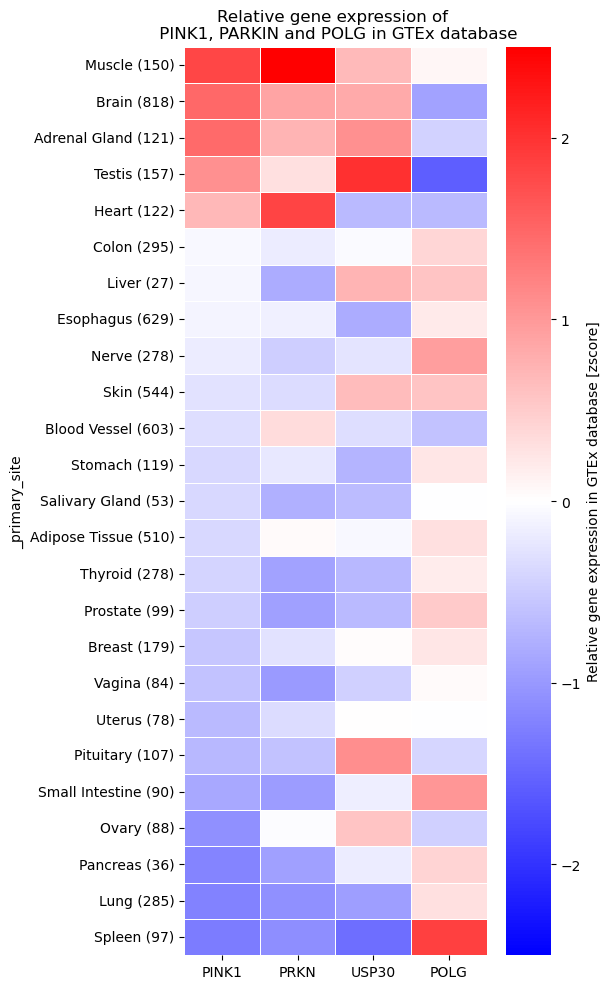

In [47]:
plt.subplots(figsize=(6,10))
plt.tight_layout()

seaborn.heatmap(df_sites, cmap="bwr", linewidths=.5, center=0, vmin=-2.5, vmax=2.5,
               cbar_kws={'label': 'Relative gene expression in GTEx database [zscore]'})
plt.title('Relative gene expression of \n PINK1, PARKIN and POLG in GTEx database')
plt.tight_layout()

#### 2) All Subgrouped tissues

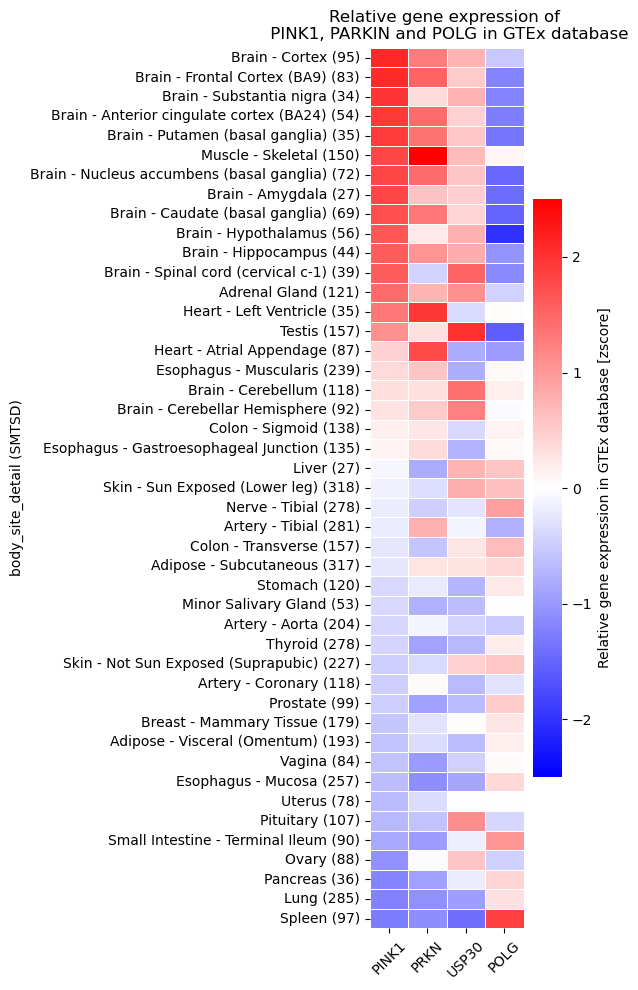

In [21]:
plt.subplots(figsize=(6,10))
plt.tight_layout()

seaborn.heatmap(df_subg, cmap="bwr", linewidths=.5, center=0, vmin=-2.5, vmax=2.5,
               cbar_kws={'label': 'Relative gene expression in GTEx database [zscore]'})
plt.title('Relative gene expression of \n PINK1, PARKIN and POLG in GTEx database')
plt.xticks(rotation=45)
plt.tight_layout()

#### 3) Only brain subtissues 

In [22]:
df_subg_Brain = df_subg[df_subg.index.str.contains('Brain')]
df_subg_Brain

PINK1      PRKN     USP30  \
body_site_detail (SMTSD)                                                       
Brain - Cortex (95)                             2.102397  1.274955  0.729321   
Brain - Frontal Cortex (BA9) (83)               2.081281  1.524534  0.511190   
Brain - Substantia nigra (34)                   1.976012  0.350532  0.751187   
Brain - Anterior cingulate cortex (BA24) (54)   1.952597  1.459986  0.462626   
Brain - Putamen (basal ganglia) (35)            1.929036  1.379899  0.566365   
Brain - Nucleus accumbens (basal ganglia) (72)  1.810454  1.461239  0.574947   
Brain - Amygdala (27)                           1.803783  0.596640  0.479653   
Brain - Caudate (basal ganglia) (69)            1.737953  1.309590  0.420994   
Brain - Hypothalamus (56)                       1.646588  0.218439  0.773912   
Brain - Hippocampus (44)                        1.596113  1.044554  0.810216   
Brain - Spinal cord (cervical c-1) (39)         1.585809 -0.437478  1.511810   
Brain - Cerebellum (118)                        0.317581  0.297537  1.389196   
Brain - Cerebellar Hemisphere (92)              0.287758  0.520648  1.231973   

                                                    POLG  
body_site_detail (SMTSD)                                  
Brain - Cortex (95)                            -0.541372  
Brain - Frontal Cortex (BA9) (83)              -1.210931  
Brain - Substantia nigra (34)                  -1.199503  
Brain - Anterior cingulate cortex (BA24) (54)  -1.269286  
Brain - Putamen (basal ganglia) (35)           -1.338423  
Brain - Nucleus accumbens (basal ganglia) (72) -1.466397  
Brain - Amygdala (27)                          -1.442954  
Brain - Caudate (basal ganglia) (69)           -1.507639  
Brain - Hypothalamus (56)                      -2.026145  
Brain - Hippocampus (44)                       -1.041634  
Brain - Spinal cord (cervical c-1) (39)        -1.160274  
Brain - Cerebellum (118)                        0.173865  
Brain - Cerebellar Hemisphere (92)             -0.055621

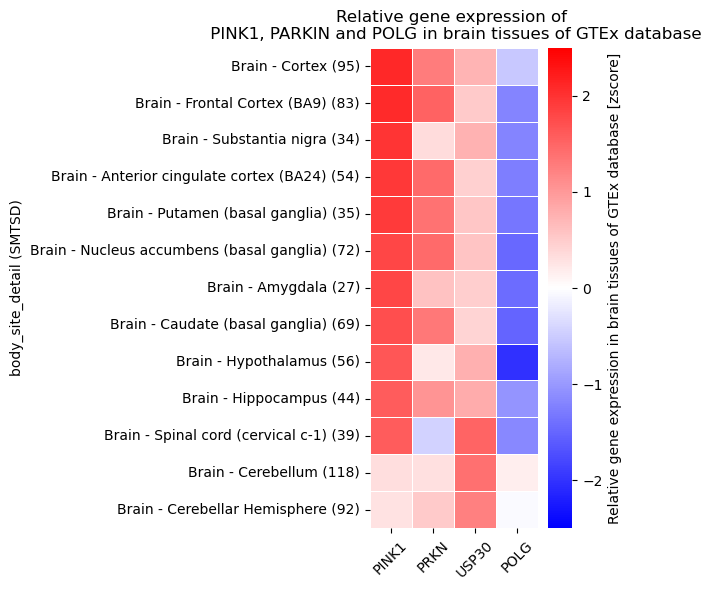

In [48]:
plt.subplots(figsize=(6,6))
plt.tight_layout()

seaborn.heatmap(df_subg_Brain, cmap="bwr", linewidths=.5, center=0, vmin=-2.5, vmax=2.5,
               cbar_kws={'label': 'Relative gene expression in brain tissues of GTEx database [zscore]'})
plt.title('Relative gene expression of \n PINK1, PARKIN and POLG in brain tissues of GTEx database')
plt.xticks(rotation=45)
plt.tight_layout()
